<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Regression Model

---

# Part 1: Problem Statement & Exploratory Data Analysis (EDA)
    Part 1: Problem Statement & Exploratory Data Analysis (EDA)
    Part 2: Data Cleaning, Feature selection and Feature Engineering

---

## Problem Statement

As purchase of housing plays a pivotal point to the human lifecycle into adulthood, we the bank find it integral to develop a model to predict the sale price of houses.
With use of the Ames housing data collected are used in the regression model to create the most accurate model. The model will be fine-tuned through analysis of features utilised, type of modelling and parameters, and will be evaluated through array of scoring such as MSE, R2 in the creation of the most accurate model.
This model will aid in housing sale price analysis giving the bank a more accurate benchmark for housing evaluation. 
A more accurate model would assist not only property agents but homeowners potentially selling and potential customers purchasing housing at that area in identifying the potential value of the property. 

### Contents:
- [Import Libraries](#Import-Libraries)
- [Import Data](#Import-Data)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
- [Analysis of null values in the column](#Analysis-of-null-values-in-the-column)
- [Correlation of numeric data types to Sale Price of house](#Correlation-of-numeric-data-types-to-Sale-Price-of-house)
- [Data Visualization: Numarical Columns](#Data-Visualization:-Numerical-Columns) 
- [Decision of droping numerical feature columns](#Decision-of-droping-numerical-feature-columns)
- [Dropping of numerical Features](#Dropping-of-numerical-Features)
- [Data Visualization: Categorical Columns](#Data-Visualization:-Categorical-Columns) 

## Executive Summary

In the following report, the following dataset of Ames Iowa Housing dataset was fitted to a regression model using the following with the consideration of the models (Linear regression, Lasso, Ridge and Elastic Net). 
From the In conclusion a regression model is used on the dataset provided. A lasso regression model is selected and with a cross validation mean score of 0.819, a mean square validation score of 0.876 and a mean cross validation of 30171 respectively. The top 5 highest coeficients to the features are Gr Liv Area, Overall Qual, Neighborhood_NdridgHt, Exter Qual and Garage Area in decreasing order respectively. The bottom 5 lowest coefficents to the features are Garage Type_Basement, Heating_Grav, Exterior 1st_HdBoard, Roof Dtyle_Mansard and Bsmt Unf SF respectively.

## Import Libraries

In [58]:
#import data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import statsmodels.api as sm 
# imputation transformer for completing missing values
from sklearn.impute import SimpleImputer
###
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Import Data

In [311]:
# Data Import (train)
train = pd.read_csv('datasets/train.csv')
print(train.shape)
print(train.head(5))
train.info()

(2051, 81)
    Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  

In [152]:
# Data Import (test)
test = pd.read_csv('datasets/test.csv')
print(test.shape)
print(test.head(5))
test.info()

(878, 80)
     Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Q

In [5]:
test = pd.read_csv('datasets/test.csv')
print(test.shape)

(878, 80)


In [207]:
train['Roof Style'].unique()

array(['Gable', 'Hip', 'Flat', 'Mansard', 'Shed', 'Gambrel'], dtype=object)

### Imported Data Dictonary 

The data dictonary is for the imported dataframe can be imported from the Kaggle competition for DSI-US-11 Project 2 Regression Challenge ([source](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/data)).

## Executive Summary

The following regressive model for the 

## Exploratory Data Analysis (EDA)

## Analysis of null values in the column

In [6]:
# Expressing train columns in percentage of missing information.
df = train.isnull().sum().sort_values(ascending=False)
per_1 = train.isnull().sum() / len(train)*100
# Casting series to a new dataframe
per_2 = (round(per_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([df,per_2], axis=1,keys=['number','percentage_null'])
missing_data.head(25)

,number,percentage_null
Pool QC,2042,99.6
Misc Feature,1986,96.8
Alley,1911,93.2
Fence,1651,80.5
Fireplace Qu,1000,48.8
Lot Frontage,330,16.1
Garage Finish,114,5.6
Garage Qual,114,5.6
Garage Yr Blt,114,5.6
Garage Cond,114,5.6


From the above code cell, the columns with the most number of null values are Pool QC, Misc Feature, Alley, Fence, Fireplace Qu, Lot Frontage, Garage Finish, Garage Qual, Garage Yr Blt, Garage Cond, Garage Type. All columns with null value above 5%, are evaluated below to check for relationship with other columns.

1. Analysis on the the column **Fireplace Qu** in relation to **Fireplaces** column.

In [7]:
train.groupby(by ='Fireplaces')['Fireplace Qu'].value_counts()

Fireplaces  Fireplace Qu
1           Gd              447
            TA              342
            Fa               49
            Po               31
            Ex               29
2           Gd               74
            TA               61
            Fa                9
            Ex                2
3           TA                3
            Gd                2
            Fa                1
4           TA                1
Name: Fireplace Qu, dtype: int64

In [8]:
train['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [9]:
train['Fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

In [10]:
train['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [11]:
train[(train['Fireplaces']==0)]['Fireplace Qu'].nunique

<bound method IndexOpsMixin.nunique of 0       NaN
2       NaN
3       NaN
4       NaN
6       NaN
       ... 
2034    NaN
2038    NaN
2039    NaN
2044    NaN
2047    NaN
Name: Fireplace Qu, Length: 1000, dtype: object>

Thus, we can conclude that the missing values are in Fireplace Qu is due to the Fireplace not being available in the appartment. The nan in the the *Fireplace Qu* column are to be replaceds as NA (Not Applicable). Thus, this missing values can be concluded to be missing at random (MAR). 

2. Analysis of **Fence** column.

In [12]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [13]:
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [14]:
train.groupby(by='Fence')['Bldg Type'].value_counts()

Fence  Bldg Type
GdPrv  1Fam          76
       Duplex         2
       Twnhs          2
       TwnhsE         2
       2fmCon         1
GdWo   1Fam          76
       Duplex         2
       Twnhs          2
MnPrv  1Fam         213
       2fmCon         7
       Twnhs          4
       TwnhsE         3
MnWw   1Fam          10
Name: Bldg Type, dtype: int64

In [15]:
train.groupby(by='Fence')['House Style'].value_counts()

Fence  House Style
GdPrv  1Story          35
       2Story          23
       SLvl            12
       1.5Fin           8
       1.5Unf           2
       2.5Fin           1
       2.5Unf           1
       SFoyer           1
GdWo   1Story          54
       1.5Fin           9
       SLvl             8
       2Story           6
       SFoyer           2
       1.5Unf           1
MnPrv  1Story         118
       1.5Fin          41
       2Story          38
       SLvl            14
       SFoyer           9
       1.5Unf           3
       2.5Unf           3
       2.5Fin           1
MnWw   1Story           5
       1.5Fin           3
       2Story           1
       SLvl             1
Name: House Style, dtype: int64

In [16]:
train.groupby(by='Fence')['Lot Config'].value_counts()

Fence  Lot Config
GdPrv  Inside         51
       Corner         23
       CulDSac         6
       FR3             2
       FR2             1
GdWo   Inside         61
       Corner         14
       FR2             3
       CulDSac         2
MnPrv  Inside        164
       Corner         46
       CulDSac        13
       FR2             2
       FR3             2
MnWw   Inside          8
       Corner          1
       FR2             1
Name: Lot Config, dtype: int64

In [17]:
train.groupby(by='Fence')['SalePrice'].value_counts(ascending=False)

Fence  SalePrice
GdPrv  140000       4
       132000       3
       260000       3
       108000       2
       110000       2
       124000       2
       130000       2
       152000       2
       157000       2
       207000       2
       89900        1
       92000        1
       118858       1
       119900       1
       122000       1
       132500       1
       136000       1
       137500       1
       138000       1
       139400       1
       142000       1
       142500       1
       145900       1
       147900       1
       148000       1
       149000       1
       149500       1
       151000       1
       151400       1
       153000       1
       154000       1
       158000       1
       158500       1
       160500       1
       161000       1
       164900       1
       165000       1
       167500       1
       169000       1
       170000       1
       171000       1
       173000       1
       174000       1
       174900       1
       175500  

From the data source, the 5 options for the fence column refers to fence quality of GdPrv (Good Privacy), MnPrv (Minimum Privacy), (GdWo) Good Wood, (MnWw) Minimum Wood/Wire or (NA) No Fence. After refering to the columns, building type, lot config, house style. There are no correlation to the fences to counter check if the missing data are null or without Fences. Thus the missing data can be attributed to houses not having fences and the NaN values are replaced with NA in the data cleaning cell in the subsequent notebook. However, there is a possibility that the data is missing and the missingness of data would be classified as data is systematically related to unobserved data, Missing not at random (MNAR).

3. Analysis of **Alley** column.

In [18]:
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [19]:
train.groupby(by='Condition 1')['Alley'].value_counts()

Condition 1  Alley
Artery       Grvl     12
Feedr        Grvl      2
             Pave      2
Norm         Grvl     71
             Pave     52
PosN         Pave      1
Name: Alley, dtype: int64

In [20]:
train.groupby(by='Condition 2')['Alley'].value_counts()

Condition 2  Alley
Norm         Grvl     85
             Pave     55
Name: Alley, dtype: int64

In [21]:
train.groupby(by='Condition 2')['SalePrice'].value_counts(ascending = True)

Condition 2  SalePrice
Artery       95000        1
             108000       1
             118000       1
             128250       1
             146000       1
                         ..
PosN         468000       1
RRAe         190000       1
RRAn         136905       1
RRNn         68500        1
             125000       1
Name: SalePrice, Length: 848, dtype: int64

From assessing the columns **Alley**, and the data dictionary of the alley column are Grvl for Gravel, Pave for Paved and NA for No alley access. Thus the missing data can be attributed to houses not having alley and the NaN values are replaced with NA in the data cleaning cell in the subsequent notebook. However, there is a possibility that the data is missing and the missingness of data would be classified as data is systematically related to unobserved data, Missing not at random (MNAR).

4. Analysis of **Misc Feature** column.

In [22]:
train['Misc Feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [23]:
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [24]:
train.groupby(by='Misc Feature')['Misc Val'].value_counts()

Misc Feature  Misc Val
Elev          17000        1
Gar2          3000         1
              4500         1
              8300         1
              12500        1
Othr          3000         1
              3500         1
              6500         1
Shed          400         12
              500          8
              600          6
              450          5
              700          4
              2000         4
              1200         2
              2500         2
              54           1
              80           1
              300          1
              455          1
              460          1
              480          1
              650          1
              800          1
              900          1
              1150         1
              1300         1
              1500         1
              4500         1
TenC          2000         1
Name: Misc Val, dtype: int64

In [25]:
train.groupby(by='Misc Feature')['Lot Shape'].value_counts()

Misc Feature  Lot Shape
Elev          IR1           1
Gar2          IR1           2
              Reg           2
Othr          IR1           1
              IR2           1
              Reg           1
Shed          Reg          36
              IR1          18
              IR2           2
TenC          IR1           1
Name: Lot Shape, dtype: int64

From above **Misc Feature** column has a 96.8% null values. 
From the data dictionary of the Misc Feature column Elev for Elevator,
Gar2 for 2nd Garage, Othr for Other, Shed for Shed (over 100 SF), TenC for Tennis Court and NA for None. Thus the missing data can be attributed to houses not having a misc feature and the NaN values are replaced with NA in the data cleaning cell in the subsequent notebook. However, there is a possibility that the data missingness of data would be classified as data is systematically related to unobserved data, Missing not at random (MNAR).

5. Analysis of **Pool QC** column.

In [26]:
train['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [27]:
train.groupby(by='Pool Area')['Pool QC'].value_counts()

Pool Area  Pool QC
228        Ex         1
368        TA         1
480        Gd         1
519        Fa         1
561        TA         1
576        Gd         1
648        Fa         1
738        Gd         1
800        Gd         1
Name: Pool QC, dtype: int64

In [28]:
train['Pool Area'].value_counts()

0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: Pool Area, dtype: int64

Thus **Pool QC** column is correlated to **Pool Area**. If Pool Area was 0, the Pool QC registered as np.nan. Thus, the missing values in **Pool QC** is replaced with NA. Thus, this missing values can be concluded to be missing at random (MAR). 

6. **Lot Frontage** column with 16.1% null values.

In [29]:
train.groupby(by='Lot Frontage')['Street'].value_counts()

Lot Frontage  Street
21.0          Pave       32
22.0          Pave        1
24.0          Pave       33
25.0          Pave        1
26.0          Pave        3
30.0          Pave       11
32.0          Pave        6
33.0          Pave        1
34.0          Pave       11
35.0          Pave       13
36.0          Pave        5
37.0          Pave        6
38.0          Pave        4
39.0          Pave        4
40.0          Pave       13
41.0          Pave       11
42.0          Pave        8
43.0          Pave       20
44.0          Pave       12
45.0          Pave        8
46.0          Pave        2
47.0          Pave        6
48.0          Pave       11
49.0          Pave        3
50.0          Pave       90
51.0          Pave       16
52.0          Pave       20
53.0          Pave       18
54.0          Pave        6
55.0          Pave       14
56.0          Pave       15
57.0          Pave       20
58.0          Pave       13
59.0          Pave       18
60.0          Pave      178

From exploring available features there is a minor correlation of the lot frontage to the Street as a general decrease in street observed as the lot frontage increase. Thus, this missing values can be assumed to be missing at random (MAR). 

 7. **Garage Finish** column with 5.6% null values

In [30]:
train.groupby(by='Garage Finish')['Garage Area'].value_counts()

Garage Finish  Garage Area
Fin            400.0          19
               440.0          16
               484.0          12
               420.0           9
               576.0           8
                              ..
Unf            928.0           1
               936.0           1
               944.0           1
               968.0           1
               1184.0          1
Name: Garage Area, Length: 815, dtype: int64

In [8]:
train['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

The column **Garage finish** after comparison to Garage Area and the data dictonary, the null values from the garage could be attributed from the house not having a garage. The missing data can be attributed to houses not having a garage area when area is 0 or the NaN values. NaN was replaced with NA in the data cleaning cell in the subsequent notebook. Thus, this missing values can be assumed to be missing at random (MAR).

8. **Garage Qual** column with 5.6% null values.

In [31]:
train.groupby(by='Garage Qual')['Garage Area'].value_counts()

Garage Qual  Garage Area
Ex           300.0          1
             840.0          1
             924.0          1
Fa           180.0          8
             200.0          4
                           ..
TA           1220.0         1
             1231.0         1
             1314.0         1
             1356.0         1
             1418.0         1
Name: Garage Area, Length: 575, dtype: int64

In [10]:
train['Garage Qual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

The column **Garage quality** after comparison to Garage Area and the data dictonary, the null values from the garage could be attributed from the house not having a garage. The missing data can be attributed to houses not having a garage area when area is 0 or the NaN values. NaN was replaced with NA in the data cleaning cell in the subsequent notebook. Thus, this missing values can be assumed to be missing at random (MAR).

9. **Garage Yr Blt** column with 5.6% null values.

In [32]:
train.groupby(by='Garage Yr Blt')['Garage Area'].value_counts()

Garage Yr Blt  Garage Area
1895.0         185.0          1
1896.0         330.0          1
1900.0         280.0          1
               576.0          1
               624.0          1
                             ..
2009.0         1138.0         1
               1166.0         1
2010.0         520.0          1
               852.0          1
2207.0         502.0          1
Name: Garage Area, Length: 1609, dtype: int64

In [12]:
train['Garage Yr Blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

The column **Garage Yr Blt** after comparison to Garage Area and the data dictonary, the null values from the garage could be attributed from the house not having a garage. The missing data can be attributed to houses not having a garage area when area is 0 or the NaN values. NaN was replaced with NA in the data cleaning cell in the subsequent notebook. Thus, this missing values can be assumed to be missing at random (MAR).

10. **Garage Cond** column with 5.6% null values.

In [17]:
train['Garage Area'].unique()

array([ 475.,  559.,  246.,  400.,  484.,  578.,  525.,  531.,  420.,
        504.,  264.,  632.,  576.,  480.,  610.,  624.,  513.,  528.,
        614.,  450.,  499.,  575.,  572.,  530.,  336.,  240.,    0.,
        542.,  481.,  410.,  826.,  384.,  546.,  276.,  850.,  602.,
        352.,  786.,  660.,  270.,  280.,  474.,  440.,  564.,  299.,
        293.,  386.,  671.,  550.,  690.,  225.,  350.,  216.,  380.,
        843.,  539.,  834.,  322., 1166.,  720.,  392.,  555.,  252.,
        502.,  516.,  608.,  495.,  396.,  556.,  725.,  670.,  560.,
        501.,  490.,  286.,  360.,  479.,  626.,  470.,  304.,  864.,
        403.,  579.,  288.,  473.,  627.,  758.,  431.,  260.,  366.,
        852.,  672.,  486.,  656.,  716.,  442.,  297.,  388.,  461.,
        447.,  619.,  308.,  506.,  319.,  676.,  312.,  478.,  342.,
        393.,  983.,  923.,  487.,  543.,  453.,  541.,  754.,  666.,
        529.,  714.,  968.,  788.,  812.,  600.,  483.,  300.,  430.,
        230.,  505.,

In [16]:
train.groupby(by='Garage Cond')['Garage Area'].value_counts()

Garage Cond  Garage Area
Ex           300.0          1
             924.0          1
Fa           180.0          3
             216.0          3
             200.0          2
                           ..
TA           1220.0         1
             1231.0         1
             1348.0         1
             1356.0         1
             1418.0         1
Name: Garage Area, Length: 563, dtype: int64

In [14]:
train['Garage Cond'].unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

The column **Garage Cond** after comparison to Garage Area and the data dictonary, the null values from the garage could be attributed from the house not having a garage. The missing data can be attributed to houses not having a garage area when area is 0 or the NaN values. The NaN was replaced with NA in the data cleaning cell in the subsequent notebook. Thus, this missing values can be assumed to be missing at random (MAR).

11. **Garage Type** column with 5.5% null values.

In [33]:
train.groupby(by='Garage Type')['Garage Area'].value_counts()

Garage Type  Garage Area
2Types       393.0          1
             579.0          1
             609.0          1
             616.0          1
             627.0          1
                           ..
Detchd       900.0          1
             902.0          1
             936.0          1
             968.0          1
             1184.0         1
Name: Garage Area, Length: 714, dtype: int64

In [34]:
train['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

The column **Garage Type** after comparison to Garage Area and the data dictonary, the null values from the garage could be attributed from the house not having a garage. The missing data can be attributed to houses not having a garage area when area is 0 or the NaN values. The NaN was replaced with NA in the data cleaning cell in the subsequent notebook. Thus, this missing values can be assumed to be missing at random (MAR).

## Data Visualization: Numarical Columns

In [188]:
numeric_column = train._get_numeric_data().columns
X = train[numeric_column]

In [195]:
# Simple Imputer for numerical columns
imp_n = SimpleImputer(strategy = 'mean') 
numeric_train = imp_n.fit_transform(X) 
X = pd.DataFrame(numeric_train, columns = X.columns)

<AxesSubplot:xlabel='Lot Frontage', ylabel='SalePrice'>

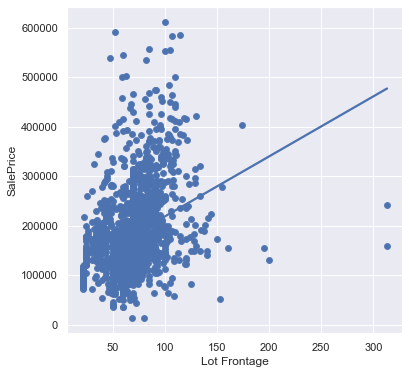

In [156]:
# Plot lot frontage against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Lot Frontage', y = 'SalePrice');
sns.regplot(x = "Lot Frontage",
            y = "SalePrice", 
            ci = None, # set to none due to the large dataset
            color = "b",
            data = X)

The scatter plot of the lot frontage feature is plotted against the sale price. A general positive linear regression is modelled from the feature of the sale price of the houses.

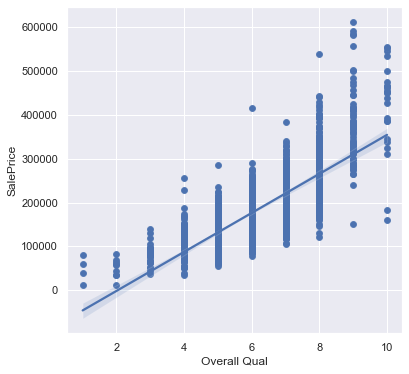

In [157]:
# Plot overall quantity against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
# Plotting scatter plot with a linear regression model fit
sns.scatterplot(data = X, x= 'Overall Qual', y = 'SalePrice');
sns.regplot(x = "Overall Qual", y = "SalePrice", ci = 100, color = "b", data = X);

The scatter plot of the overall qual feature is plotted against the sale price and falls within a categorical format. This is in-line with the data dictonary of the overall quality which is a range of values from 1 to 10. A general positive linear regression is modelled from the feature to the sale price of the houses.

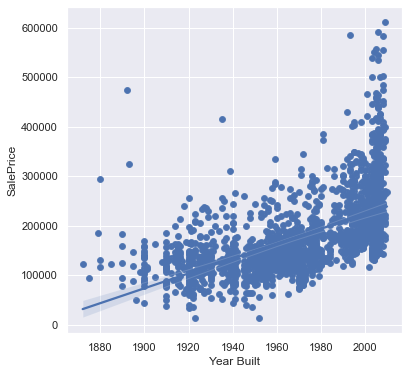

In [158]:
# Plot year built against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Year Built', y = 'SalePrice');
sns.regplot(x = "Year Built",
            y = "SalePrice",
            ci = 100,
            color = "b",
            data = X);

In [133]:
X.groupby(by='Year Built')['Yr Sold'].value_counts()

Year Built  Yr Sold
1872.0      2008.0      1
1875.0      2010.0      1
1879.0      2007.0      1
1880.0      2007.0      1
            2008.0      1
            2009.0      1
1885.0      2010.0      1
1890.0      2008.0      2
            2009.0      2
            2007.0      1
1892.0      2006.0      1
1893.0      2008.0      1
1895.0      2007.0      2
            2008.0      1
1896.0      2010.0      1
1898.0      2009.0      1
1900.0      2006.0      6
            2009.0      5
            2007.0      3
            2008.0      3
            2010.0      3
1901.0      2007.0      2
1905.0      2006.0      1
            2008.0      1
1908.0      2006.0      1
1910.0      2009.0      7
            2007.0      6
            2008.0      6
            2006.0      5
            2010.0      2
1911.0      2008.0      1
1912.0      2008.0      1
            2009.0      1
            2010.0      1
1913.0      2007.0      1
1914.0      2008.0      3
            2006.0      2
            2007.0

The scatter plot of the overall quality feature is plotted against the sale price and falls within a categorical format. This is in-line with the data dictonary of the overall quality which is a range of values from 1 to 10. A general positive linear regression is modelled from the feature to the sale price of the houses. From the scatter plot there, are no outliers to be rejected and this is emphasised as the year built is below or equal to year sold.

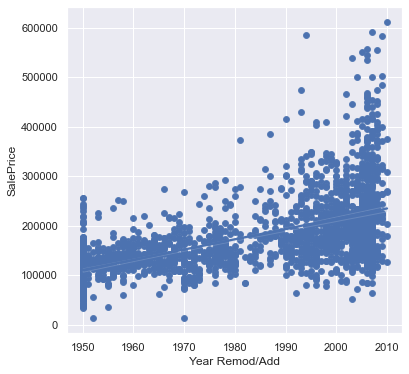

In [159]:
# Plot year remod/add against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Year Remod/Add', y = 'SalePrice');
sns.regplot(x = "Year Remod/Add",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the year the house is remodeled feature has a general increase positive regression fit to the sale price output. From the scatter plot there, are no outliers to be rejected.

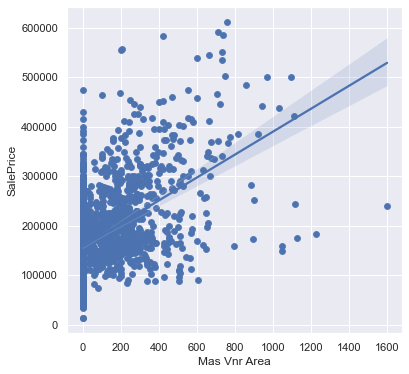

In [160]:
# Plot mas vnr area against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Mas Vnr Area', y = 'SalePrice');
sns.regplot(x = "Mas Vnr Area",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the mas vnr area feature has a general positive regression fit to the sale price output. From the scatter plot there, are no outliers rejected as there is insufficient information to remove the outliers in the scatter plot.

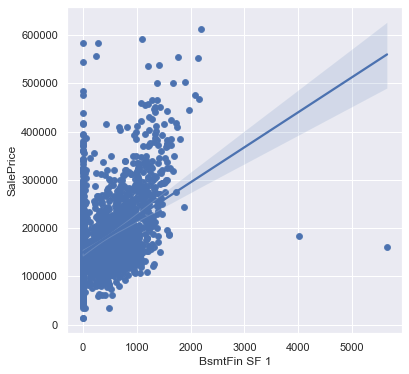

In [161]:
# Plot bsmtfin SF1 against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'BsmtFin SF 1', y = 'SalePrice');
sns.regplot(x = "BsmtFin SF 1",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the bsmtfin SF1 feature has a general positive linear correlation to the sale price output. From the scatter plot there, are no outliers to be rejected.

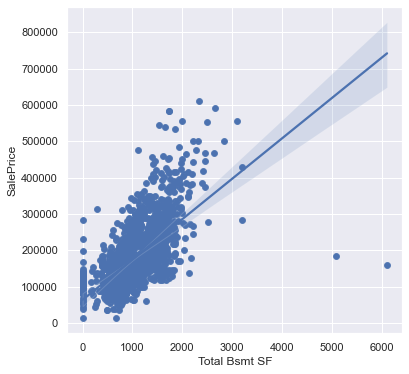

In [162]:
# Plot Total Bsmt SF against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Total Bsmt SF', y = 'SalePrice');
sns.regplot(x = "Total Bsmt SF",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the total bsmtfin SF feature has a general positive linear correlation to the sale price output. From the scatter plot there, are no outliers to be rejected.

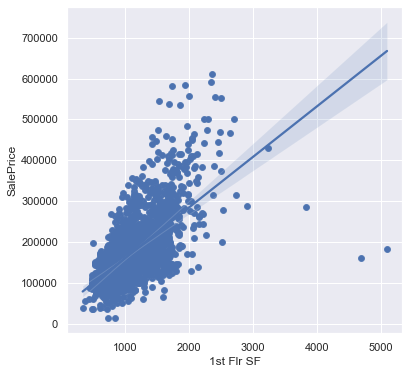

In [163]:
# Plot 1st Flr SF against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= '1st Flr SF', y = 'SalePrice');
sns.regplot(x = "1st Flr SF",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the 1st floor surface floor feature has a general positive linear correlation to the sale price output. From the scatter plot there, are no outliers to be rejected.

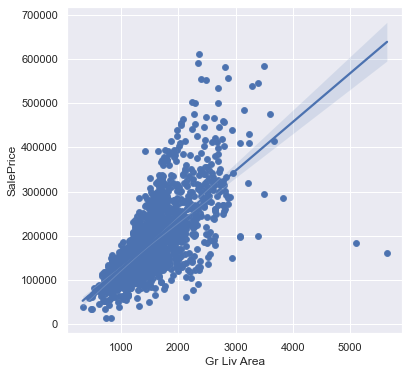

In [164]:
# Plot Gr Liv Area against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Gr Liv Area', y = 'SalePrice');
sns.regplot(x = "Gr Liv Area",
            y = "SalePrice",
            color = "b",
            data = X);

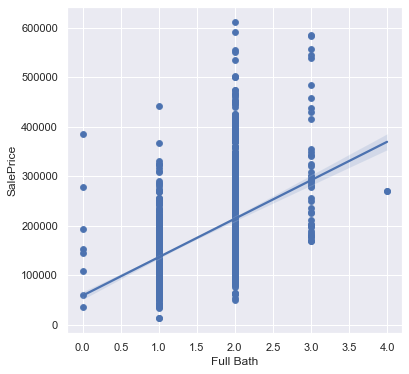

In [165]:
# Plot Full Bath against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Full Bath', y = 'SalePrice');
sns.regplot(x = "Full Bath",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the full bath has a general positive linear correlation to the sale price output. The data within the column falls within a categoical column. From the scatter plot there, are no outliers to be rejected.

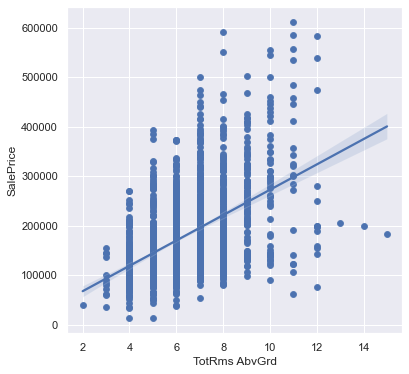

In [166]:
# Plot TotRms Abv Grd against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'TotRms AbvGrd', y = 'SalePrice');
sns.regplot(x = "TotRms AbvGrd",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the total room above ground has a general positive linear correlation to the sale price output. The data within the column falls within a categoical column. From the scatter plot there, are no outliers to be rejected.

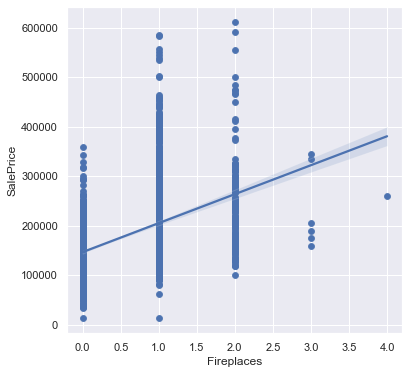

In [167]:
# Plot Fireplaces against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Fireplaces', y = 'SalePrice');
sns.regplot(x = "Fireplaces",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the fireplaces has a general positive linear correlation to the sale price output. The data within the column falls within a categoical column. From the scatter plot there, are no outliers to be rejected.

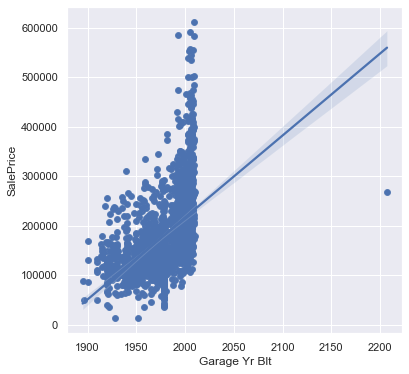

In [168]:
# Plot Garage Yr Blt against SalePrice
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Garage Yr Blt', y = 'SalePrice');
sns.regplot(x = "Garage Yr Blt",
            y = "SalePrice",
            color = "b",
            data = X);

In [124]:
X['Garage Yr Blt'].value_counts()

1978.707796    114
2005.000000    105
2007.000000     84
2006.000000     80
2004.000000     72
2003.000000     66
1977.000000     46
1998.000000     45
2008.000000     44
2000.000000     41
2002.000000     40
1999.000000     39
1976.000000     35
1993.000000     34
1978.000000     33
1968.000000     32
1950.000000     32
1958.000000     32
1996.000000     31
1956.000000     31
1966.000000     29
1965.000000     27
2001.000000     27
1997.000000     26
1967.000000     26
1995.000000     26
1964.000000     25
1979.000000     25
1994.000000     25
1954.000000     25
1962.000000     25
1975.000000     25
1959.000000     23
1963.000000     22
1992.000000     22
1980.000000     22
1920.000000     21
1960.000000     21
1990.000000     21
1930.000000     20
1970.000000     20
1973.000000     20
1961.000000     20
1957.000000     20
1940.000000     20
1953.000000     19
1974.000000     19
1969.000000     18
1971.000000     18
2009.000000     17
1972.000000     17
1987.000000     16
1939.000000 

The scatter plot of Garage Yr Blt has a general positive linear correlation to the sale price output. From the scatter plot there, is an outlier of garage year built in **2200** to be dropped prior to modelling.

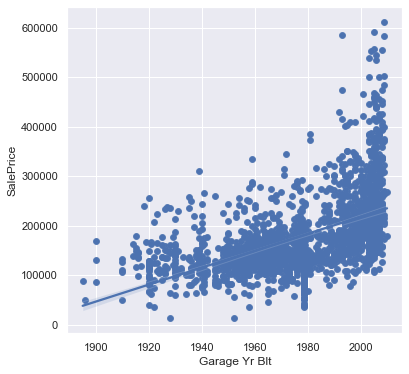

In [170]:
### Dropping of the outlier row in the data frame
X.drop(X.loc[X['Garage Yr Blt'] > 2200,:].index, inplace=True)

### Replot of the Garage Yr Blt removing the above outlier
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Garage Yr Blt', y = 'SalePrice');
sns.regplot(x = "Garage Yr Blt",
            y = "SalePrice",
            color = "b",
            data = X);

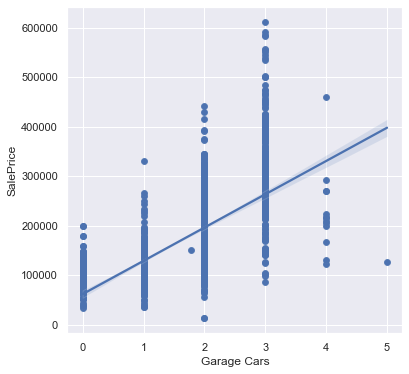

In [171]:
# Plot Garage Cars against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Garage Cars', y = 'SalePrice');
sns.regplot(x = "Garage Cars",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the garage cars has a general positive linear correlation to the sale price output. The data within the column falls within a categoical column. From the scatter plot there, are no outliers to be rejected.

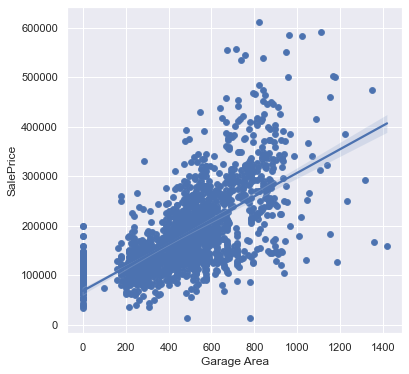

In [172]:
# Plot Garage Area against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Garage Area', y = 'SalePrice');
sns.regplot(x = "Garage Area",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the garage area has a general positive linear correlation to the sale price output. From the scatter plot there, are no outliers to be rejected.

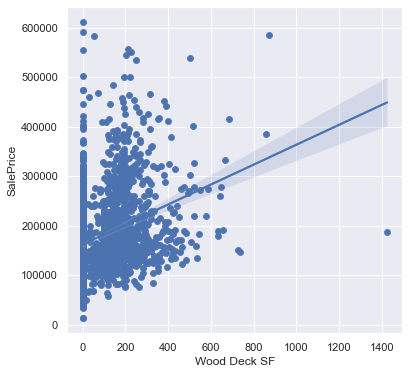

In [173]:
# Plot Wood Deck SF against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Wood Deck SF', y = 'SalePrice');
sns.regplot(x = "Wood Deck SF",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the wood deck SF has a general positive linear correlation to the sale price output. From the scatter plot there, are no outliers to be rejected.

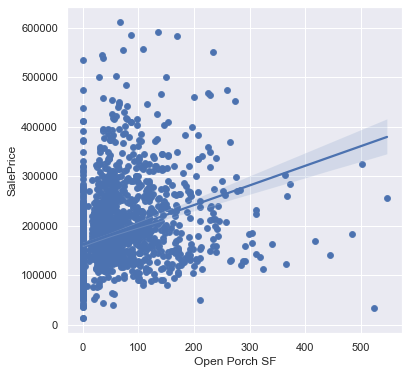

In [174]:
# Plot Open Porch SF against SalePrice 
sns.set_theme()
fig, axes = plt.subplots(figsize=(6,6))
sns.scatterplot(data = X, x= 'Open Porch SF', y = 'SalePrice');
sns.regplot(x = "Open Porch SF",
            y = "SalePrice",
            color = "b",
            data = X);

The scatter plot of the open porch surface floor has a general positive linear correlation to the sale price output. The data within the column falls within a categoical column. From the scatter plot there, are no outliers to be rejected.

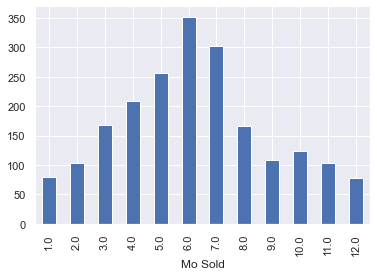

In [146]:
mon_s = X.groupby(by= 'Mo Sold')['SalePrice'].count()
mon_s.plot(kind='bar');

The top 3 months to for house sales are June, July and May respectively. The bottom 3 months for house sales are in december, janruary and february.

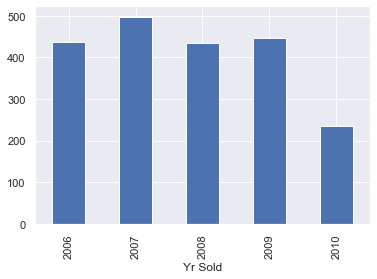

In [150]:
yr_s = train.groupby(by= 'Yr Sold')['SalePrice'].count()
yr_s.plot(kind='bar');

The top year for sale of housing is 2007 while the worst year for the sale of housing is in 2010.

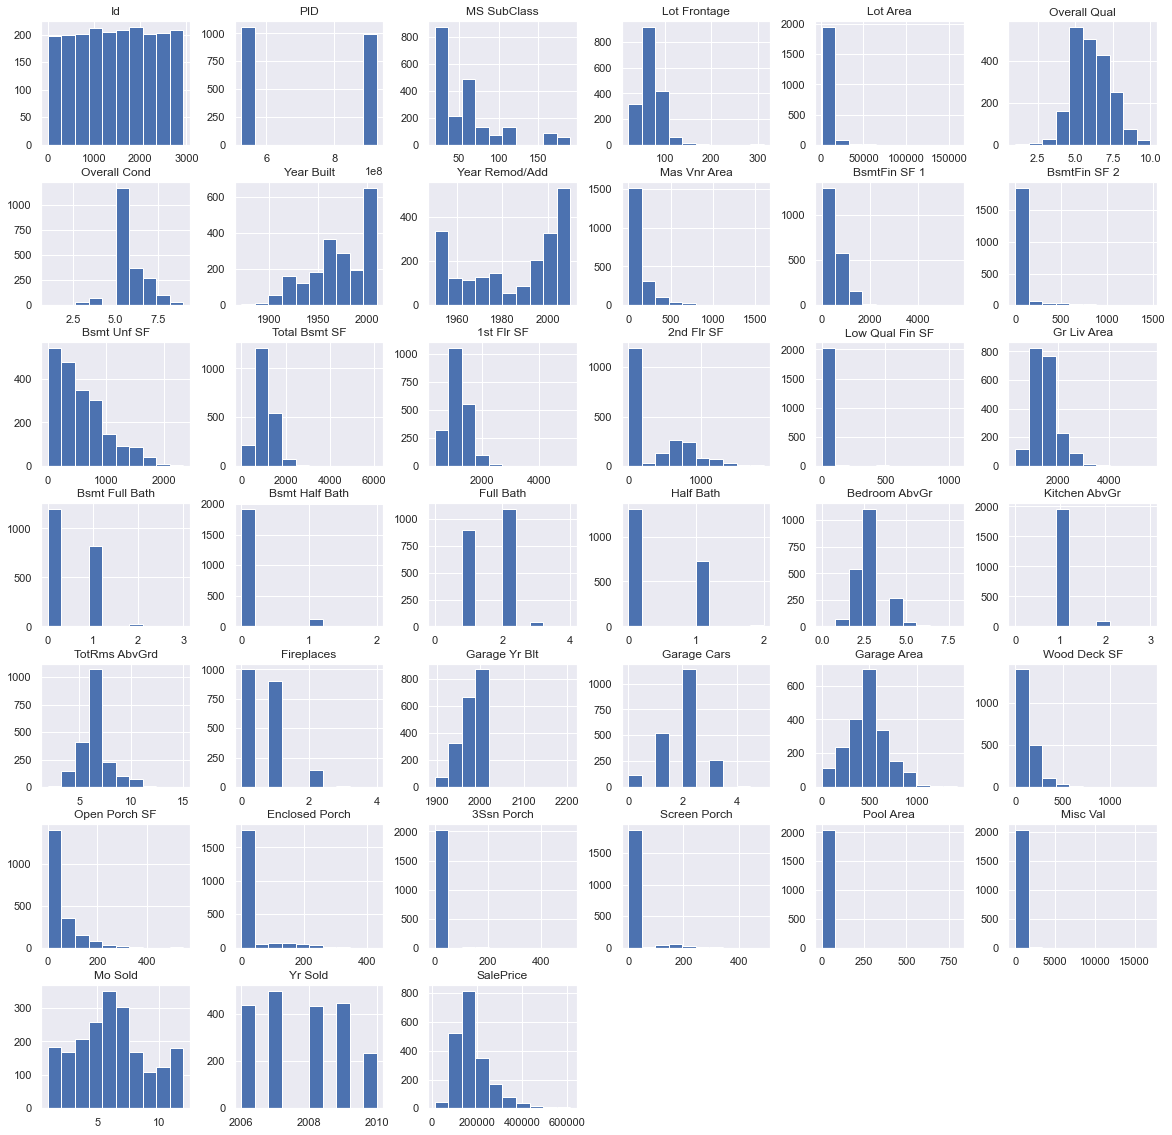

In [148]:
train.hist(figsize=(20, 20));

Based on the inspection of the histogram of the numerical columns, several features appear to be zero-inflated (left or right-skewed curve) and not following normal distribution.

## Decision of droping numerical feature columns

From the numerical columns, the features are evaluated on the variance, pearson correlation to Sale Price (output), p-values to determine if the feature is significant to be kept for the modelling stage.

The columns are noted for the following attributes are favourable:
1. Variance below 1 
2. Pearson correlation smaller than 0.3 (Only a statistically significant columns are kept to reduce multicolinearity of the model)
3. Analysis of the null-hypothesis, p-values more than 0.05 (Only a statistically significant columns, backward regression)

The feature columns are dropped in at 3 points in the analysis. They are for the numerical columns, the ordinal categorical columns and the nominal categorical columns.

In [175]:
X.var().sort_values(ascending=True)

Kitchen AbvGr      4.403243e-02
Bsmt Half Bath     6.332262e-02
Half Bath          2.510990e-01
Bsmt Full Bath     2.729647e-01
Full Bath          3.017679e-01
Fireplaces         4.078204e-01
Garage Cars        5.844930e-01
Bedroom AbvGr      6.832839e-01
Overall Cond       1.220355e+00
Yr Sold            1.721927e+00
Overall Qual       2.033500e+00
TotRms AbvGrd      2.435397e+00
Mo Sold            7.533478e+00
Year Remod/Add     4.424857e+02
Lot Frontage       4.541819e+02
Garage Yr Blt      5.861063e+02
3Ssn Porch         6.368408e+02
Year Built         9.105753e+02
Pool Area          1.428216e+03
MS SubClass        1.834140e+03
Low Qual Fin SF    2.609287e+03
Screen Porch       3.293273e+03
Enclosed Porch     3.582936e+03
Open Porch SF      4.456264e+03
Wood Deck SF       1.653231e+04
BsmtFin SF 2       2.722417e+04
Mas Vnr Area       3.029836e+04
Garage Area        4.662734e+04
1st Flr SF         1.571689e+05
2nd Flr SF         1.812313e+05
Bsmt Unf SF        1.979085e+05
Total Bs

In [176]:
corr_val = X.corr()['SalePrice'].sort_values(ascending=False)

In [177]:
# filtering to statistically significant correlated features with pearson coeff > 0.3
corr_val_high = corr_val[corr_val>0.3]
corr_val_high

SalePrice         1.000000
Overall Qual      0.800078
Gr Liv Area       0.697173
Garage Area       0.650366
Garage Cars       0.648241
Total Bsmt SF     0.628455
1st Flr SF        0.618284
Year Built        0.571592
Year Remod/Add    0.550112
Full Bath         0.537794
Garage Yr Blt     0.523002
Mas Vnr Area      0.508748
TotRms AbvGrd     0.504316
Fireplaces        0.470936
BsmtFin SF 1      0.423316
Open Porch SF     0.333990
Wood Deck SF      0.326433
Lot Frontage      0.325969
Name: SalePrice, dtype: float64

In [178]:
# filtering to statistically non-significant correlated features with pearson coeff < 0.3
corr_val_high = corr_val[corr_val<0.3]
corr_val_high

Lot Area           0.296794
Bsmt Full Bath     0.283989
Half Bath          0.283511
2nd Flr SF         0.248968
Bsmt Unf SF        0.189753
Bedroom AbvGr      0.137681
Screen Porch       0.134775
3Ssn Porch         0.048800
Mo Sold            0.032217
Pool Area          0.023147
BsmtFin SF 2       0.016407
Misc Val          -0.007329
Yr Sold           -0.014896
Low Qual Fin SF   -0.041549
Bsmt Half Bath    -0.045171
Id                -0.051917
MS SubClass       -0.086919
Overall Cond      -0.096784
Kitchen AbvGr     -0.125373
Enclosed Porch    -0.135501
PID               -0.255765
Name: SalePrice, dtype: float64

In [49]:
X.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Removal of Sale Price from the numeric data

In [191]:
feature = [col for col in X._get_numeric_data().columns if col != 'SalePrice']

In [198]:
# Re-define the the X and y to seperate the features and the output
X = X[feature]
y = train['SalePrice']

In [200]:
X = sm.add_constant(X, prepend=True) 
results = sm.OLS(y, X).fit()

In [201]:
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     289.8
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:39:57   Log-Likelihood:                -24178.
No. Observations:                2051   AIC:                         4.843e+04
Df Residuals:                    2014   BIC:                         4.864e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.658e+07   9.55e+06      1.736      0.083   -2.15e+06    3.53e+07
Id                -12.9897      7.497     -1.733      0.083     -27.692       1.712
PID              3.851e-06   7.32e-06      0.526      0.599   -1.05e-05    1.82e-05
MS SubClass      -146.5994     21.028     -6.972      0.000    -187.839    -105.360
Lot Frontage      -12.0953     41.942     -0.288      0.773     -94.349      70.159
Lot Area            0.6060      0.125      4.848      0.000       0.361       0.851
Overall Qual     1.723e+04    899.314     19.160      0.000    1.55e+04     1.9e+04
Overall Cond     3521.8234    803.826      4.381      0.000    1945.405    5098.242
Year Built        275.2647     51.870      5.307      0.000     173.540     376.990
Year Remod/Add    200.5157     54.758      3.662      0.000      93.127     307.904
Mas Vnr Area       34.6784      4.929      7.035      0.000      25.012      44.345
BsmtFin SF 1       10.7748      1.923      5.604      0.000       7.004      14.545
BsmtFin SF 2        0.2833      3.451      0.082      0.935      -6.484       7.051
Bsmt Unf SF        -1.7882      1.833     -0.976      0.329      -5.383       1.807
Total Bsmt SF       9.2700      2.524      3.673      0.000       4.320      14.220
1st Flr SF         22.4082      4.565      4.908      0.000      13.455      31.362
2nd Flr SF         16.2119      4.195      3.864      0.000       7.984      24.440
Low Qual Fin SF   -10.1603     10.920     -0.930      0.352     -31.576      11.255
Gr Liv Area        28.4597      4.347      6.547      0.000      19.935      36.985
Bsmt Full Bath   7862.6200   2005.184      3.921      0.000    3930.169    1.18e+04
Bsmt Half Bath  -2182.4715   3051.185     -0.715      0.475   -8166.280    3801.337
Full Bath        1439.1241   2156.823      0.667      0.505   -2790.714    5668.962
Half Bath       -1552.2008   2110.322     -0.736      0.462   -5690.842    2586.441
Bedroom AbvGr   -7211.3190   1297.929     -5.556      0.000   -9756.743   -4665.895
Kitchen AbvGr   -1.021e+04   4267.256     -2.392      0.017   -1.86e+04   -1837.695
TotRms AbvGrd    4416.7536    967.258      4.566      0.000    2519.822    6313.685
Fireplaces       3800.9604   1402.341      2.710      0.007    1050.769    6551.152
Garage Yr Blt     127.4119     51.567      2.471      0.014      26.282     228.542
Garage Cars      4566.5617   2289.416      1.995      0.046      76.690    9056.433
Garage Area        14.6728      8.101      1.811      0.070      -1.214      30.559
Wood Deck SF       23.8608      6.200      3.848      0.000      11.701      36.021
Open Porch SF       8.2228     11.902      0.691      0.490     -15.118      31.564
Enclosed Porch     24.3671     13.166      1.851      0.064      -1.454      50.188
3Ssn Porch         24.0739     28.448      0.846      0.398

## Dropping of numerical Features

From the above statistical model, the probability (F-statistic) is 0, adjusted R-square (0.835). P>|t| values below 0.05, is likely to have correlation to the output feature y(Sale Price). Features with  pearson correlation is below 0.3 to Sale Price and has a P>|t| above 0.05 are dropped prior to the modeling stage. 


## Data Visualization: Categorical Columns

The following categorical columns are check if the columns are ordinal or nominal columns. Ordinal columns will be filled in accordance to the data dictonary and assigned in the order in preference in the options by mapping in the data cleaning section. The nominal columns will filled in using the simple imputer function for the categorial columns in the data cleaning column.

In [313]:
cat_column = train.select_dtypes(include=['object']).columns
X = train[cat_column]
X = X.assign(SalePrice = train['SalePrice'])
X.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,130500
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,220000
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,109000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,174000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD,138500


In [314]:
# Simple Imputer for categorical columns
imp_c = SimpleImputer(strategy = 'most_frequent') 
numeric_train = imp_c.fit_transform(X) 
X_cat = pd.DataFrame(numeric_train, columns = X.columns)

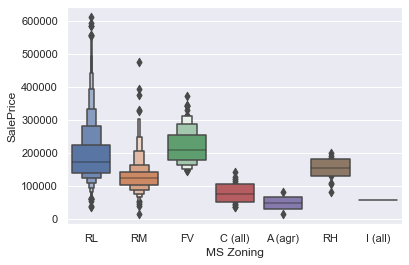

In [237]:
# MS Zoning column
sns.boxenplot(x='MS Zoning',y='SalePrice',data= X);

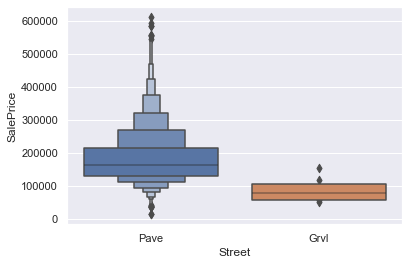

In [238]:
# Street
sns.boxenplot(x='Street',y='SalePrice',data=X);

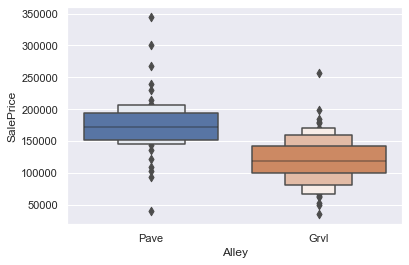

In [239]:
# Alley
sns.boxenplot(x='Alley',y='SalePrice',data=X);

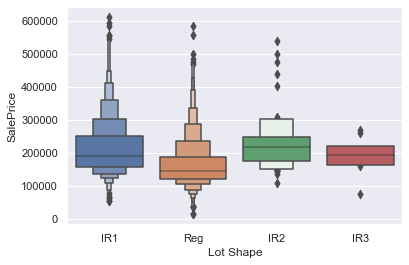

In [243]:
# Lot Shape
sns.boxenplot(x='Lot Shape',y='SalePrice',data=X);

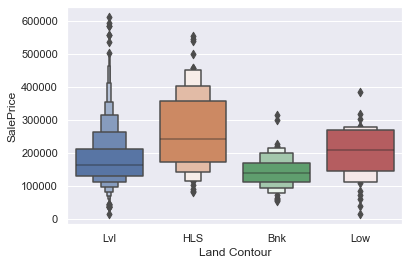

In [244]:
# Land Contour
sns.boxenplot(x='Land Contour',y='SalePrice',data=X);

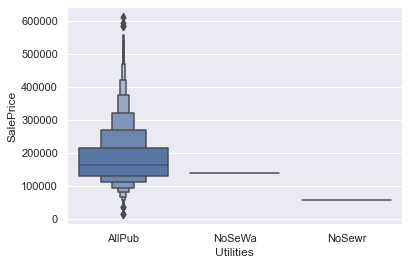

In [245]:
# Utilities
sns.boxenplot(x='Utilities',y='SalePrice',data=X);

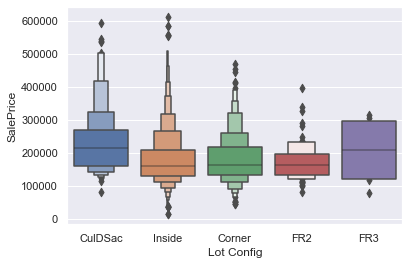

In [246]:
# Lot Config
sns.boxenplot(x='Lot Config',y='SalePrice',data=X);

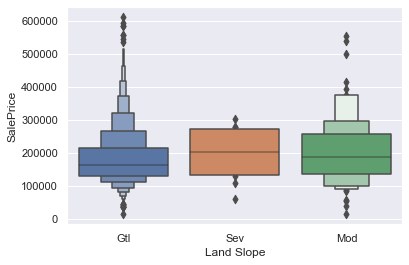

In [247]:
# Land Slope
sns.boxenplot(x='Land Slope',y='SalePrice',data=X);

In [250]:
# Neighborhood
X['Neighborhood'].unique()


array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

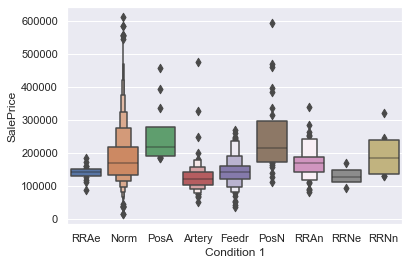

In [251]:
# Condition 1
sns.boxenplot(x='Condition 1',y='SalePrice',data=X);

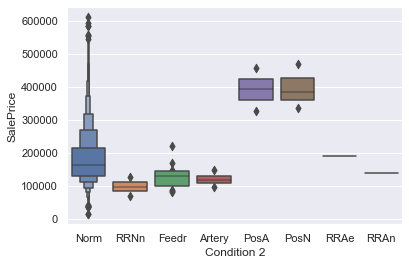

In [252]:
# Condition 2
sns.boxenplot(x='Condition 2',y='SalePrice',data=X);

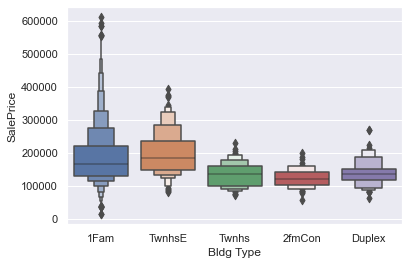

In [253]:
# Bldg Type
sns.boxenplot(x='Bldg Type',y='SalePrice',data=X);

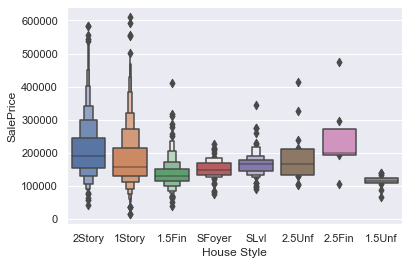

In [254]:
# House Style
sns.boxenplot(x='House Style',y='SalePrice',data=X);

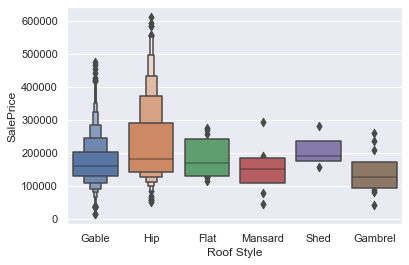

In [255]:
# Roof Style
sns.boxenplot(x='Roof Style',y='SalePrice',data=X);

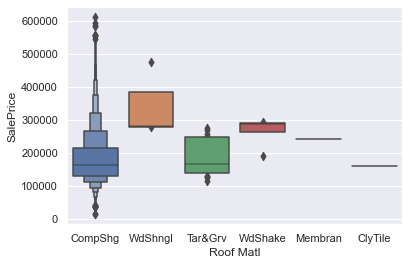

In [256]:
# Roof Matl
sns.boxenplot(x='Roof Matl',y='SalePrice',data=X);

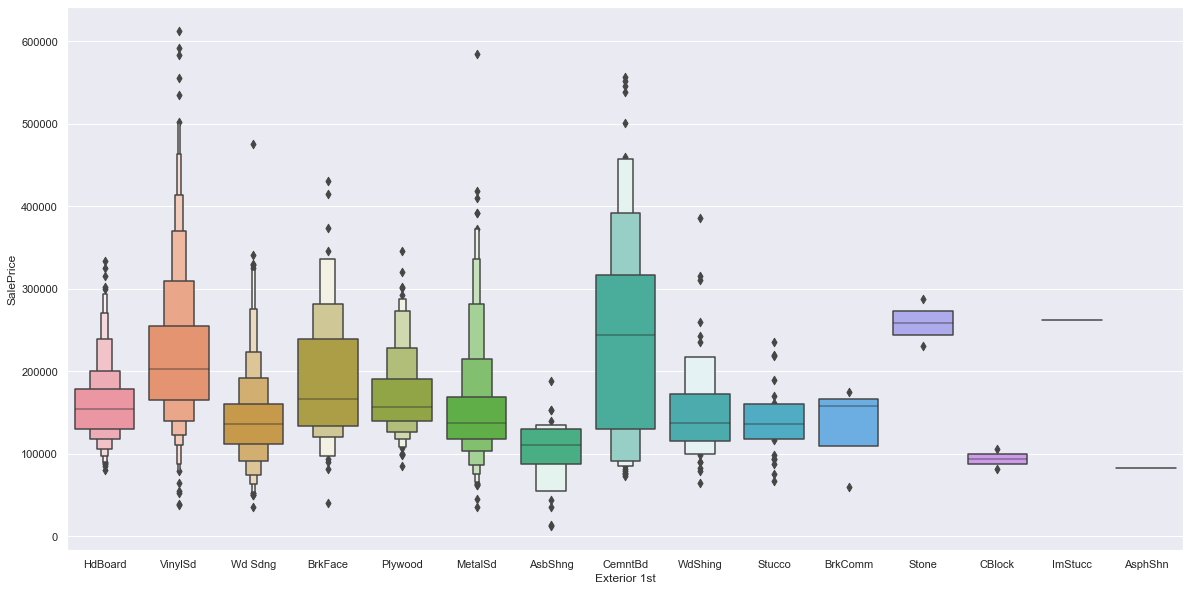

In [257]:
# Exterior 1st
fig, axes = plt.subplots(figsize=(20,10))
sns.boxenplot(x='Exterior 1st',y='SalePrice',data=X);

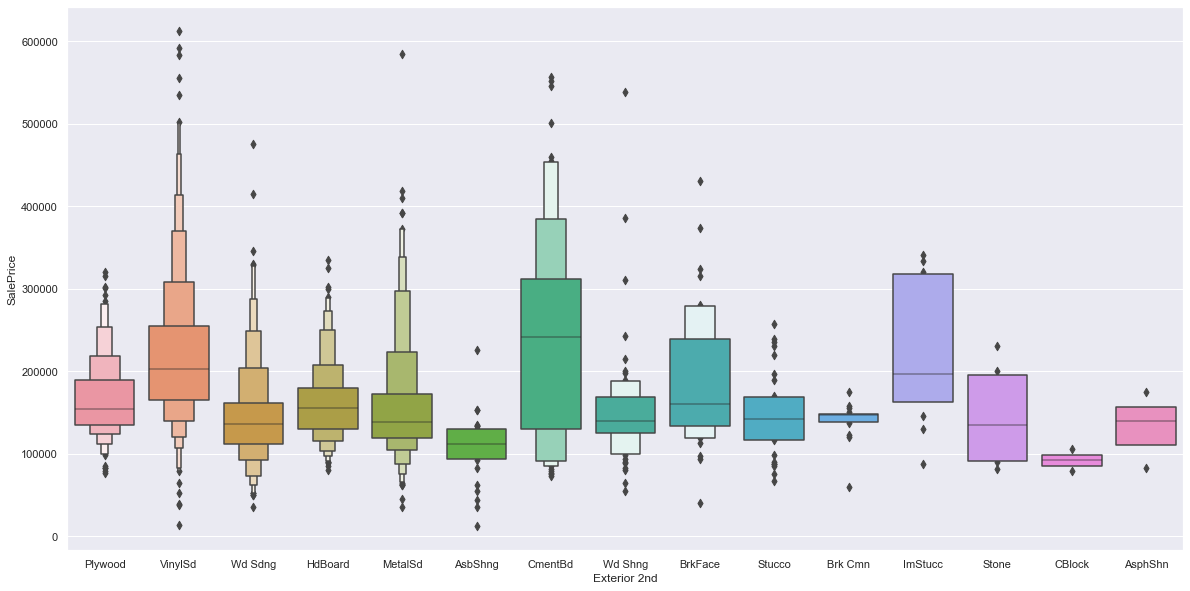

In [258]:
# Exterior 2nd
fig, axes = plt.subplots(figsize=(20,10))
sns.boxenplot(x='Exterior 2nd',y='SalePrice',data=X);

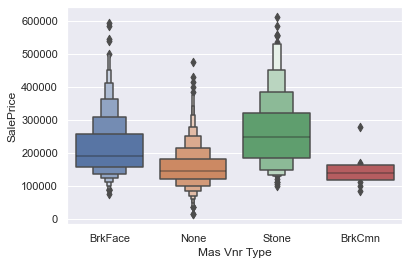

In [259]:
# Mas Vnr Type
sns.boxenplot(x='Mas Vnr Type',y='SalePrice',data=X);

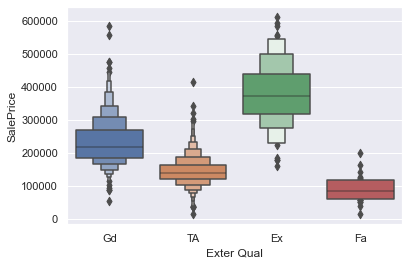

In [260]:
# Exter Qual
sns.boxenplot(x='Exter Qual',y='SalePrice',data=X);

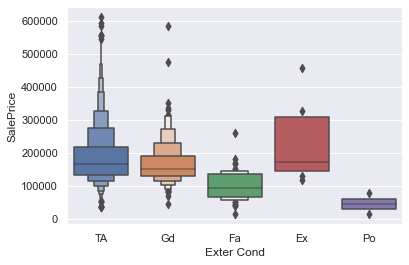

In [261]:
# Exter Cond
sns.boxenplot(x='Exter Cond',y='SalePrice',data=X);

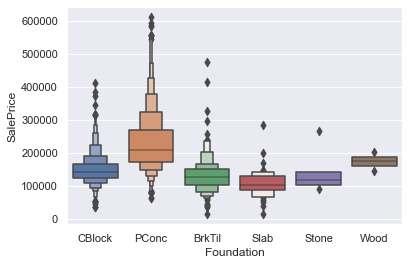

In [263]:
# Foundation
sns.boxenplot(x='Foundation',y='SalePrice',data=X);

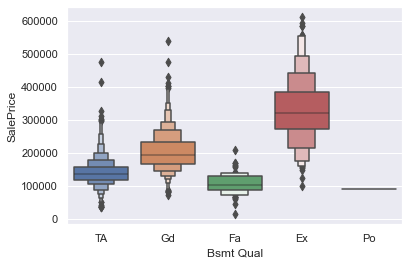

In [264]:
# Bsmt Qual
sns.boxenplot(x='Bsmt Qual',y='SalePrice',data=X);

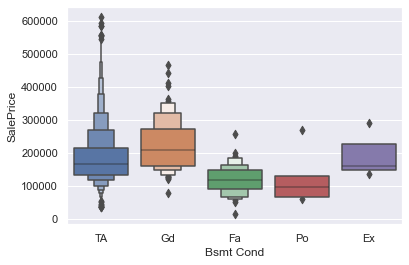

In [265]:
# Bsmt Cond
sns.boxenplot(x='Bsmt Cond',y='SalePrice',data=X);

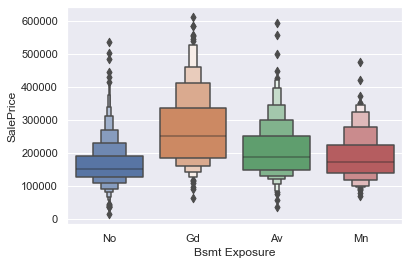

In [266]:
# Bsmt Exposure
sns.boxenplot(x='Bsmt Exposure',y='SalePrice',data=X);

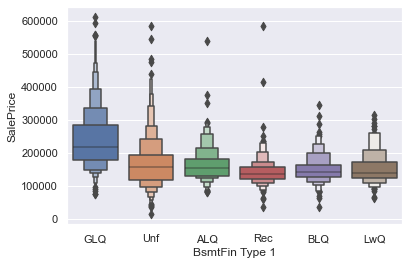

In [267]:
# BsmtFin Type 1
sns.boxenplot(x='BsmtFin Type 1',y='SalePrice',data=X);

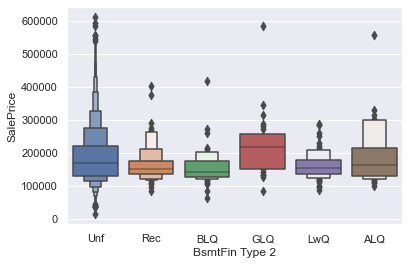

In [268]:
# BsmtFin Type 2
sns.boxenplot(x='BsmtFin Type 2',y='SalePrice',data=X);

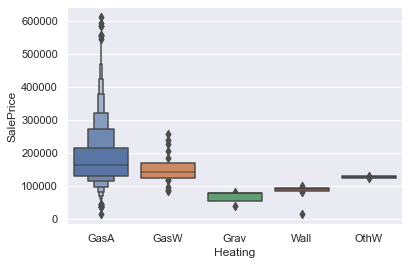

In [269]:
# Heating
sns.boxenplot(x='Heating',y='SalePrice',data=X);

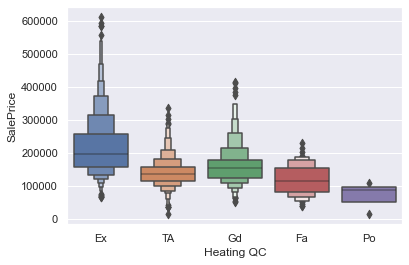

In [270]:
# Heating QC
sns.boxenplot(x='Heating QC',y='SalePrice',data=X);

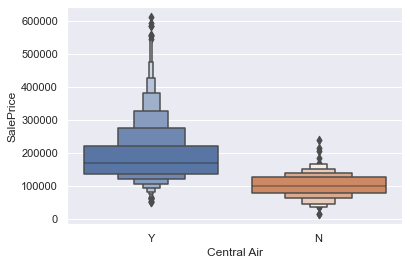

In [271]:
# Central Air
sns.boxenplot(x='Central Air',y='SalePrice',data=X);

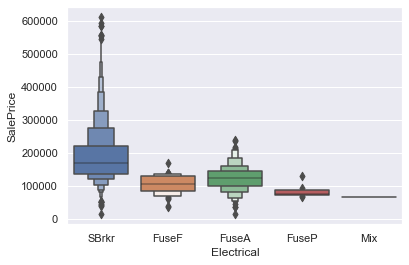

In [272]:
# Electrical
sns.boxenplot(x='Electrical',y='SalePrice',data=X);

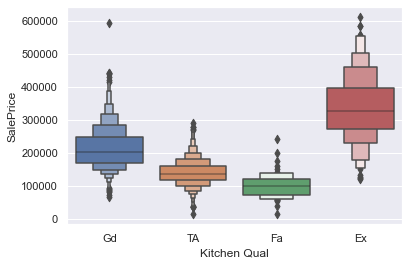

In [273]:
# Kitchen Qual
sns.boxenplot(x='Kitchen Qual',y='SalePrice',data=X);

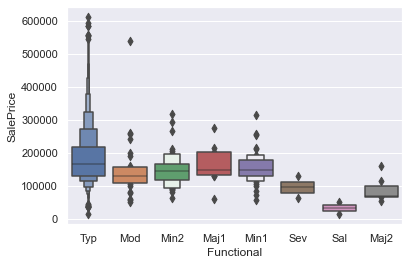

In [277]:
# Functional
sns.boxenplot(x='Functional',y='SalePrice',data=X);

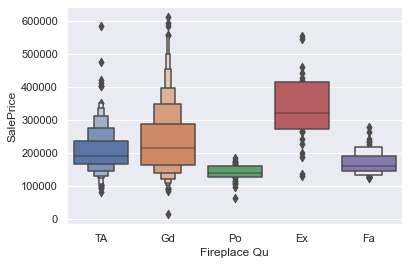

In [278]:
# Fireplace Qu
sns.boxenplot(x='Fireplace Qu',y='SalePrice',data=X);

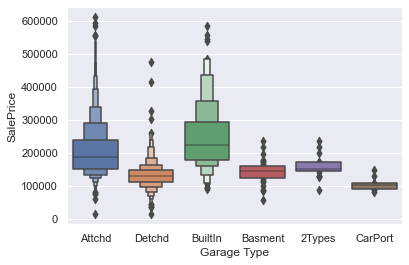

In [279]:
# Garage Type
sns.boxenplot(x='Garage Type',y='SalePrice',data=X);

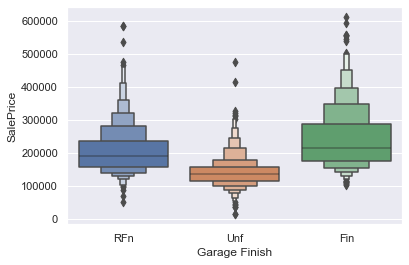

In [280]:
# Garage Finish
sns.boxenplot(x='Garage Finish',y='SalePrice',data=X);

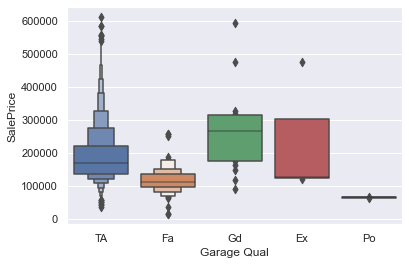

In [281]:
# Garage Qual
sns.boxenplot(x='Garage Qual',y='SalePrice',data=X);

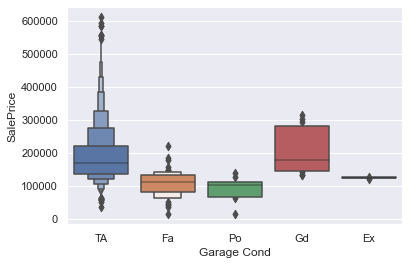

In [282]:
# Garage Cond
sns.boxenplot(x='Garage Cond',y='SalePrice',data=X);

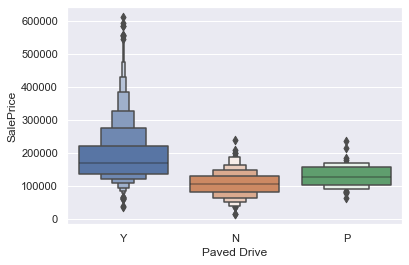

In [283]:
# Paved Drive
sns.boxenplot(x='Paved Drive',y='SalePrice',data=X);

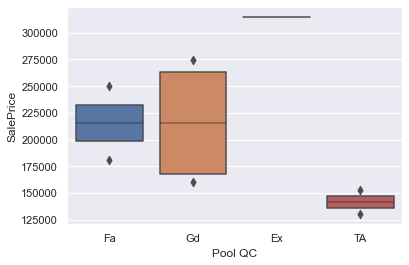

In [284]:
# Pool QC
sns.boxenplot(x='Pool QC',y='SalePrice',data=X);

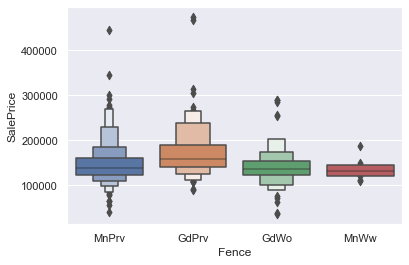

In [285]:
# Fence
sns.boxenplot(x='Fence',y='SalePrice',data=X);

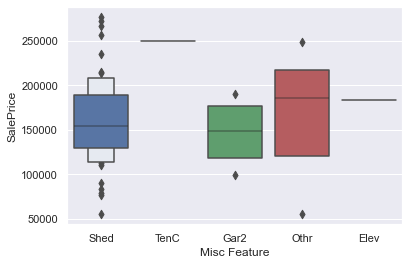

In [286]:
# Misc Feature
sns.boxenplot(x='Misc Feature',y='SalePrice',data=X);

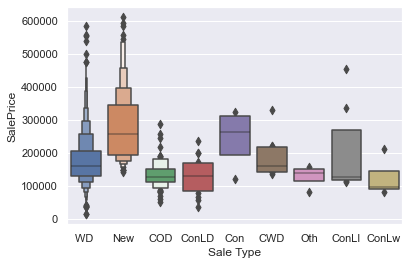

In [287]:
# Sale Type
sns.boxenplot(x='Sale Type',y='SalePrice',data=X);

From the categorical columns in the train dataframe, boxen plot was generated for all columns to determine the distribution of the 
data and to make outliers more visible in the columns. From the above plots and filters, there are some features does have outliers present such as in features, (ie.Sale Type, Misc Feature). However, these outliers are not removed from the dataframe because the information may be significant to the model and has no contrasting information to check against the column.

In addition, the following feature columns are itdentified to be ordinals, Alley, Lot Shape, Land Contour, Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating QC, Central Air, Electrical, Kitchen Qual, Fireplace Qu, Garage Finish, Garage Qual, Garage Cond, Pool QC and Fence. The remaining columns are taken to be nominal categorical columns. 

From the boxen plot above, there is no significant categorical columns with data highly favouring a particular option within the categorical column. Thus variance threshold is not used for the above dataset.

## Decision to drop ordinal categorical columns

In [315]:
# Cleaning of the train
# Fill in categorical columns which does not have equal weightages between options. 
t_c = []
t_c = X.copy()
# Removal of duplicate column
t_c = t_c.drop_duplicates()

## Use Mapping to encode the catagorical columns which has ranking within the categories into ordinals.
# Type casting the str into int (Alley)
t_c['Alley'].fillna('NA', inplace=True)
# Type casting the str into int (Bsmt Qual)
t_c['Bsmt Qual'].fillna('NA', inplace=True)
# Type casting the str into int (Bsmt Cond)
t_c['Bsmt Cond'].fillna('NA', inplace=True)
# Type casting the str into int (Bsmt Exposure)
t_c['Bsmt Exposure'].fillna('NA', inplace=True)
# Type casting the str into int (BsmtFin Type 1)
t_c['BsmtFin Type 1'].fillna('NA', inplace=True)
# Type casting the str into int (BsmtFin Type 2)
t_c['BsmtFin Type 2'].fillna('NA', inplace=True)
# Type casting the str into int (Fireplace Qu)
t_c['Fireplace Qu'].replace(np.nan, 'NA', inplace=True)
# Type casting the str into int (Garage Finish)
t_c['Garage Finish'].fillna('NA', inplace=True)
# Type casting the str into int (Garage Qual)
t_c['Garage Qual'].fillna('NA', inplace=True)
# Typae casting the str into int (Garage Cond)
t_c['Garage Cond'].fillna('NA', inplace=True)
# Type casting the str into int (Pool QC)
t_c['Pool QC'].fillna('NA', inplace=True)
# Type casting the str into int (Fence)
t_c['Fence'].fillna('NA', inplace=True)

print(t_c.shape)
t_c.info()

(2051, 43)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2051 non-null   object
 1   Street          2051 non-null   object
 2   Alley           2051 non-null   object
 3   Lot Shape       2051 non-null   object
 4   Land Contour    2051 non-null   object
 5   Utilities       2051 non-null   object
 6   Lot Config      2051 non-null   object
 7   Land Slope      2051 non-null   object
 8   Neighborhood    2051 non-null   object
 9   Condition 1     2051 non-null   object
 10  Condition 2     2051 non-null   object
 11  Bldg Type       2051 non-null   object
 12  House Style     2051 non-null   object
 13  Roof Style      2051 non-null   object
 14  Roof Matl       2051 non-null   object
 15  Exterior 1st    2051 non-null   object
 16  Exterior 2nd    2051 non-null   object
 17  Mas Vnr Type    2029 non-null   object
 1

In [316]:
# Type casting the str into int (Alley)
t_c['Alley'] = t_c['Alley'].map({'Grvl': 2, 'Pave':1, 'NA': 0})
# Type casting the str into int (Lot Shape)
t_c['Lot Shape'] = t_c['Lot Shape'].map({'Reg': 3, 'IR1':2 , 'IR2':1, 'IR3': 0})
# Type casting the str into int (Land Contor)
t_c['Land Contour'] = t_c['Land Contour'].map({'Lvl': 3, 'HLS':2 , 'Bnk':1, 'Low': 0})
# Type casting the str into int (Exter Qual)
t_c['Exter Qual'] = t_c['Exter Qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Exter Cond)
t_c['Exter Cond'] = t_c['Exter Cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Bsmt Qual)
t_c['Bsmt Qual'] = t_c['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Bsmt Cond)
t_c['Bsmt Cond'] = t_c['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Bsmt Exposure)
t_c['Bsmt Exposure'] = t_c['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
# Type casting the str into int (BsmtFin Type 1)
t_c['BsmtFin Type 1'] = t_c['BsmtFin Type 1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
# Type casting the str into int (BsmtFin Type 2)
t_c['BsmtFin Type 2'] = t_c['BsmtFin Type 2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
# Type casting the str into int (Heating QC)
t_c['Heating QC'] = t_c['Heating QC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Central Air)
t_c['Central Air'] = t_c['Central Air'].map({'Y': 1, 'N': 0})
# Type casting the str into int (Electrical)
t_c['Electrical'] = t_c['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})
# Type casting the str into int (Kitchen Qual)
t_c['Kitchen Qual'] = t_c['Kitchen Qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Fireplace Qu)
t_c['Fireplace Qu'] = t_c['Fireplace Qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Garage Finish)
t_c['Garage Finish'] = t_c['Garage Finish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0})
# Type casting the str into int (Garage Qual)
t_c['Garage Qual'] = t_c['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Typae casting the str into int (Garage Cond)
t_c['Garage Cond'] = t_c['Garage Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Pool QC)
t_c['Pool QC'] = t_c['Pool QC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0})
# Type casting the str into int (Fence)
t_c['Fence'] = t_c['Fence'].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0})

t_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2051 non-null   object
 1   Street          2051 non-null   object
 2   Alley           2051 non-null   int64 
 3   Lot Shape       2051 non-null   int64 
 4   Land Contour    2051 non-null   int64 
 5   Utilities       2051 non-null   object
 6   Lot Config      2051 non-null   object
 7   Land Slope      2051 non-null   object
 8   Neighborhood    2051 non-null   object
 9   Condition 1     2051 non-null   object
 10  Condition 2     2051 non-null   object
 11  Bldg Type       2051 non-null   object
 12  House Style     2051 non-null   object
 13  Roof Style      2051 non-null   object
 14  Roof Matl       2051 non-null   object
 15  Exterior 1st    2051 non-null   object
 16  Exterior 2nd    2051 non-null   object
 17  Mas Vnr Type    2029 non-null   object
 18  Exter Qu

In [317]:
feat_cat = [col for col in t_c._get_numeric_data().columns if col != 'SalePrice']
feat_cat

['Alley',
 'Lot Shape',
 'Land Contour',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence']

In [318]:
X = t_c[feat_cat]
y = train['SalePrice']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Alley           2051 non-null   int64
 1   Lot Shape       2051 non-null   int64
 2   Land Contour    2051 non-null   int64
 3   Exter Qual      2051 non-null   int64
 4   Exter Cond      2051 non-null   int64
 5   Bsmt Qual       2051 non-null   int64
 6   Bsmt Cond       2051 non-null   int64
 7   Bsmt Exposure   2051 non-null   int64
 8   BsmtFin Type 1  2051 non-null   int64
 9   BsmtFin Type 2  2051 non-null   int64
 10  Heating QC      2051 non-null   int64
 11  Central Air     2051 non-null   int64
 12  Electrical      2051 non-null   int64
 13  Kitchen Qual    2051 non-null   int64
 14  Fireplace Qu    2051 non-null   int64
 15  Garage Finish   2051 non-null   int64
 16  Garage Qual     2051 non-null   int64
 17  Garage Cond     2051 non-null   int64
 18  Pool QC         2051 non-nul

In [299]:
X.var().sort_values(ascending=True)

Pool QC           0.030129
Central Air       0.064052
Exter Cond        0.138974
Electrical        0.161987
Alley             0.180642
Lot Shape         0.320939
Bsmt Cond         0.327195
Exter Qual        0.345699
Land Contour      0.353074
Kitchen Qual      0.442993
Garage Cond       0.512791
Garage Qual       0.520205
Garage Finish     0.808146
Bsmt Qual         0.812949
BsmtFin Type 2    0.901686
Heating QC        0.929513
Bsmt Exposure     1.165190
Fence             1.472515
Fireplace Qu      3.265518
BsmtFin Type 1    4.518142
dtype: float64

In [302]:
corr_val = t_c.corr()['SalePrice'].sort_values(ascending=False)
corr_val

SalePrice         1.000000
Exter Qual        0.712146
Kitchen Qual      0.692336
Bsmt Qual         0.612188
Garage Finish     0.557839
Fireplace Qu      0.538925
Heating QC        0.458354
Bsmt Exposure     0.424863
BsmtFin Type 1    0.350362
Garage Qual       0.285281
Central Air       0.277378
Garage Cond       0.265021
Electrical        0.247842
Bsmt Cond         0.225075
Exter Cond        0.036418
Pool QC           0.030585
BsmtFin Type 2    0.014070
Land Contour     -0.031081
Alley            -0.154787
Fence            -0.159060
Lot Shape        -0.294542
Name: SalePrice, dtype: float64

In [319]:
# filtering to statistically non-significant correlated features with pearson coeff < 0.3
corr_val_high = corr_val[corr_val<0.3]
corr_val_high

Garage Qual       0.285281
Central Air       0.277378
Garage Cond       0.265021
Electrical        0.247842
Bsmt Cond         0.225075
Exter Cond        0.036418
Pool QC           0.030585
BsmtFin Type 2    0.014070
Land Contour     -0.031081
Alley            -0.154787
Fence            -0.159060
Lot Shape        -0.294542
Name: SalePrice, dtype: float64

Columns with a Pearson correlation of 0.3 to SalePrice, is dropped prior to modelling.

In [303]:
X = sm.add_constant(X, prepend=True) 
results = sm.OLS(y, X).fit()

In [304]:
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:53:48   Log-Likelihood:                -24790.
No. Observations:                2051   AIC:                         4.962e+04
Df Residuals:                    2030   BIC:                         4.974e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.772e+04    1.3e+04     -2.908      0.004   -6.32e+04   -1.23e+04
Alley          -4653.3641   2353.850     -1.977      0.048   -9269.578     -37.150
Lot Shape      -6345.2621   1795.929     -3.533      0.000   -9867.318   -2823.207
Land Contour   -3636.3752   1669.535     -2.178      0.030   -6910.555    -362.195
Exter Qual      3.296e+04   2703.030     12.194      0.000    2.77e+04    3.83e+04
Exter Cond      5142.4863   2676.096      1.922      0.055    -105.694    1.04e+04
Bsmt Qual       1.859e+04   1917.980      9.692      0.000    1.48e+04    2.24e+04
Bsmt Cond       -1.43e+04   2382.995     -5.999      0.000    -1.9e+04   -9622.798
Bsmt Exposure   7841.3141   1046.398      7.494      0.000    5789.189    9893.439
BsmtFin Type 1  1918.7523    517.338      3.709      0.000     904.184    2933.321
BsmtFin Type 2  -521.3632   1048.788     -0.497      0.619   -2578.177    1535.450
Heating QC      1523.6312   1253.910      1.215      0.224    -935.453    3982.716
Central Air     5855.7289   4531.982      1.292      0.196   -3032.091    1.47e+04
Electrical      -559.1474   2661.383     -0.210      0.834   -5778.474    4660.180
Kitchen Qual    2.793e+04   2220.082     12.581      0.000    2.36e+04    3.23e+04
Fireplace Qu    1.034e+04    596.685     17.321      0.000    9165.237    1.15e+04
Garage Finish   5007.8720   1532.477      3.268      0.001    2002.480    8013.264
Garage Qual     8836.0342   4301.696      2.054      0.040     399.835    1.73e+04
Garage Cond    -5539.3828   4328.332     -1.280      0.201    -1.4e+04    2949.053
Pool QC        -2984.1636   5573.304     -0.535      0.592   -1.39e+04    7945.827
Fence             12.0843    828.209      0.015      0.988   -1612.144    1636.313
==============================================================================
Omnibus:                      505.557   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2698.227
Skew:                           1.056   Prob(JB):                         0.00
Kurtosis:                       8.207   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above statistical model, the probability (F-statistic) is 0, adjusted R-square (0.703). P>|t| values below 0.05, is likely to have correlation to the output feature y(Sale Price). Features to be dropped prior to the modeling stages are features with both the pearson correlation is below 0.3 to Sale Price and has a P>|t| above 0.05.